In [1]:
from chinese_checkers.simulation.SimulationData import SimulationData
from chinese_checkers.simulation.SimulationMetadata import SimulationMetadata
from src.chinese_checkers.game.ChineseCheckersGame import ChineseCheckersGame
from src.chinese_checkers.geometry.Printer import Printer
from src.chinese_checkers.simulation.GameSimulation import GameSimulation
from src.chinese_checkers.model.BootstrapModel import BootstrapModel
from src.chinese_checkers.simulation.SimulationCatalog import SimulationCatalog

from tqdm import tqdm

# import logging
# logging.basicConfig(level=logging.INFO)  

---

### Sample target positions

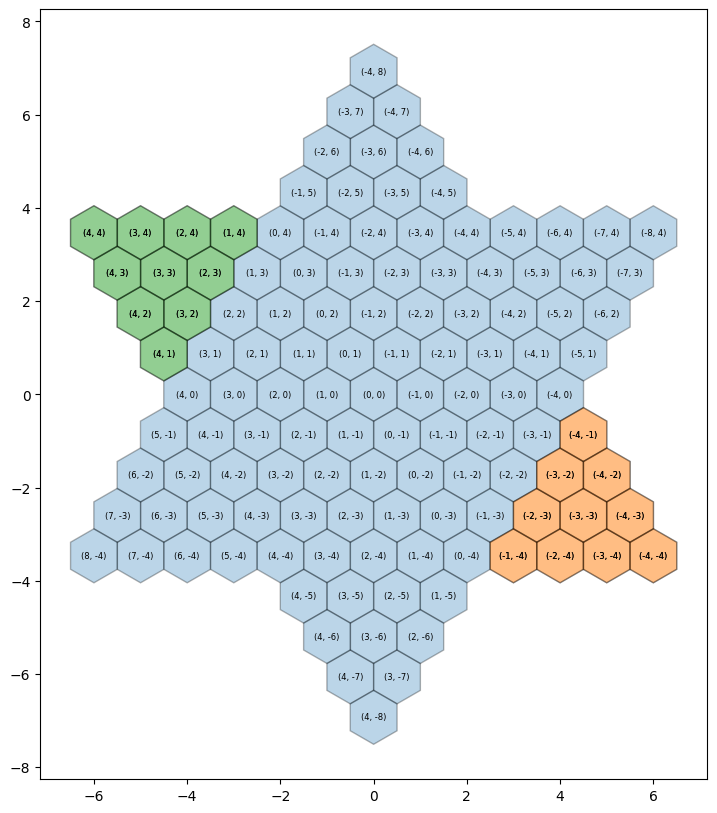

In [2]:
# set up the game
printer = Printer(plot_size=10, show_coordinates=True)
game = ChineseCheckersGame.start_game(2)

printer.print(
    game.board.hexagram_points,
    game.players[1].positions,
    game.players[1].target_positions
)

---
### Simulate a game between two centroid models

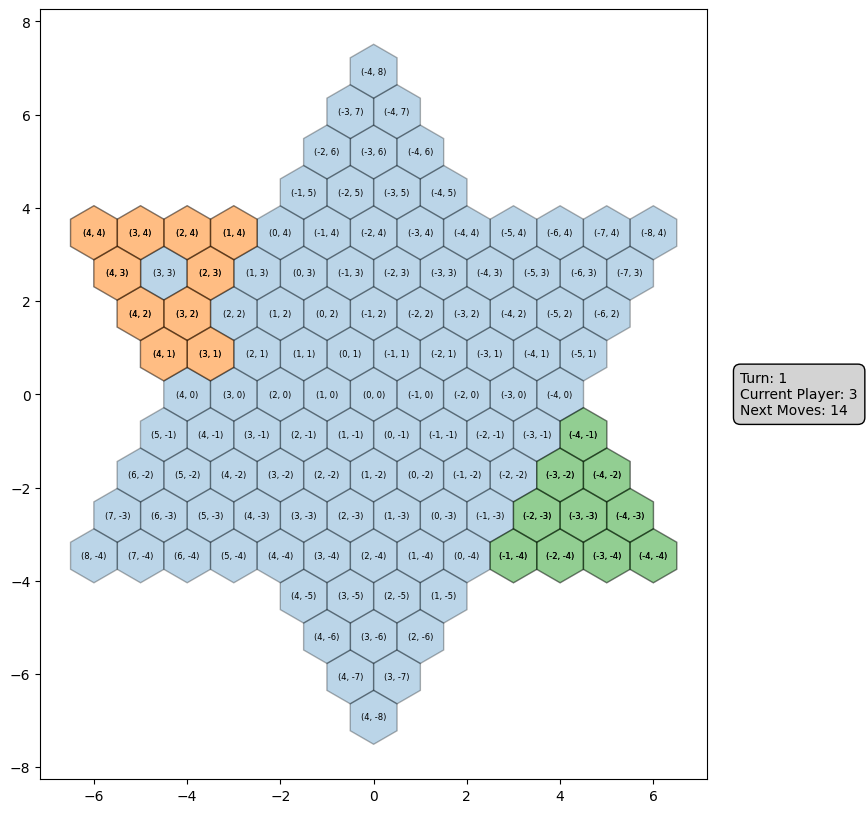

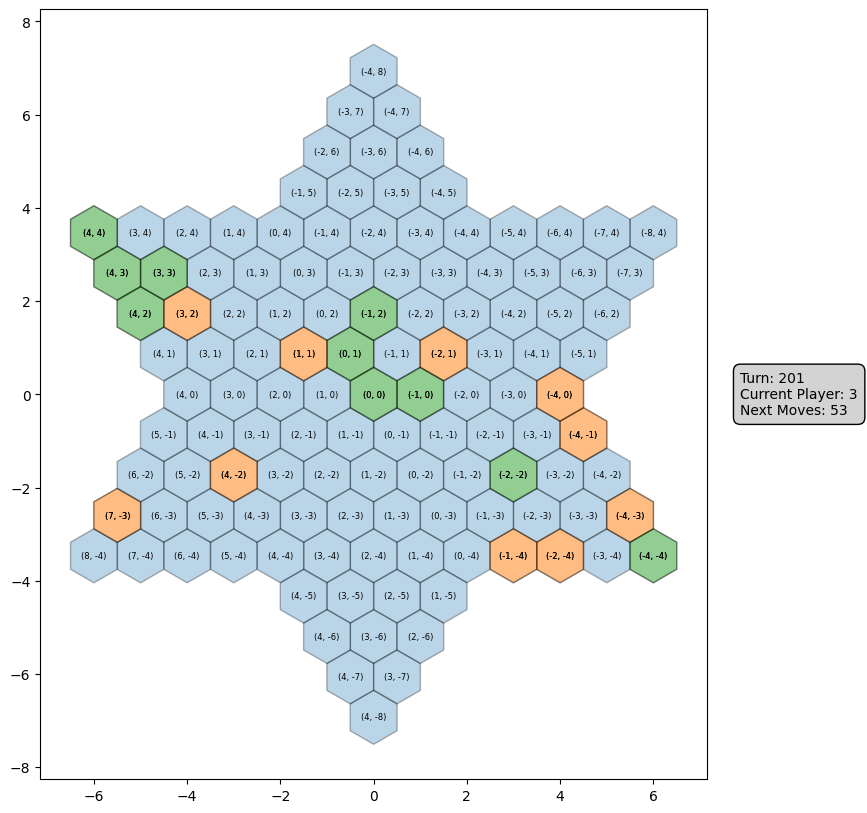

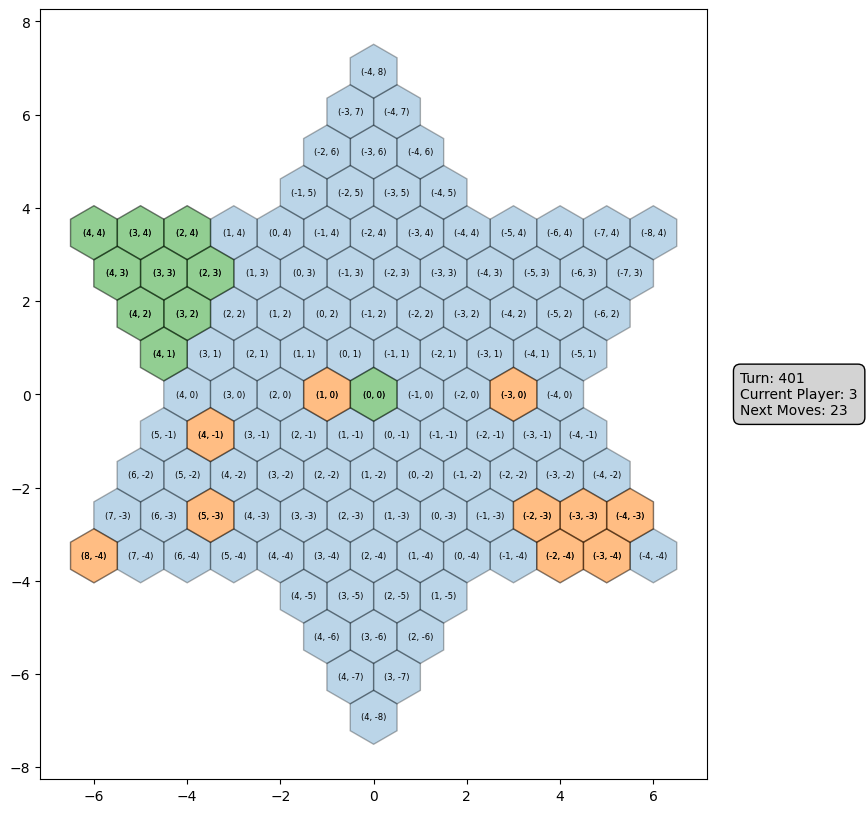

In [3]:
simulation_name = "bootstrap-simulation-random-noise"
model_1 = BootstrapModel(random_noise=0.5)
model_2 = BootstrapModel()
game_simulation = GameSimulation.simulate_game(
    models=[model_1, model_2],
    name=simulation_name,
    version="v0.0.1",
    print_period=200,
    show_coordinates=True
)
game_metadata: SimulationMetadata = game_simulation.metadata
game_data: SimulationData = game_simulation.data

In [4]:
print(game_metadata)

SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='3', name='bootstrap-simulation-random-noise', version='v0.0.1')


Creating Animation:   0%|          | 0/48 [00:00<?, ?it/s]


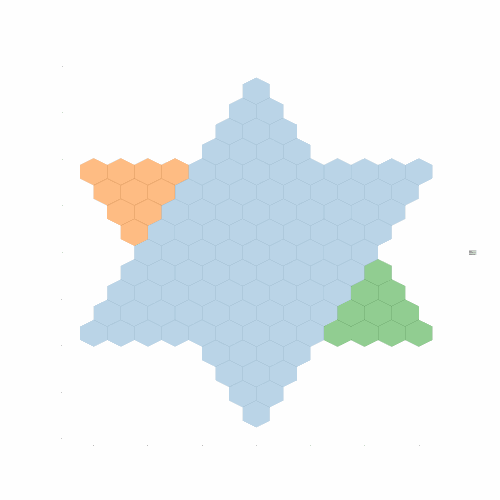

In [4]:
# display the game
game_simulation.display()

In [6]:
game_simulation.save_animation()

Creating Animation:   0%|          | 0/333 [00:00<?, ?it/s]


---
### Generate a Training Data from the Bootstrap Model

In [7]:
catalog = SimulationCatalog()
simulation_name = "bootstrap-simulation-random-noise"

model_1 = BootstrapModel(random_noise=0.5)
model_2 = BootstrapModel(dont_fail=True)

In [ ]:
successful_games = 0

progress_bar = tqdm(range(100000), desc="Simulating Games", unit="game")

for game_number in progress_bar:
    try:
        game_simulation = GameSimulation.simulate_game(
            models=[model_1, model_2],
            name=simulation_name,
            version="v0.0.1",
            max_turns=300,
            # print_period=100,
            # show_coordinates=True
        )
        game_metadata: SimulationMetadata = game_simulation.metadata
        game_data: SimulationData = game_simulation.data

        winner_id = game_metadata.winning_player
        if winner_id is not None:
            catalog.save_simulation(game_simulation)
            successful_games += 1  

    except Exception as e:
        pass 

    progress_bar.set_postfix(completed=successful_games, total=game_number+1)

progress_bar.close()

Simulating Games:   0%|          | 259/100000 [00:32<3:29:10,  7.95game/s, completed=0, total=260]